In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [161]:
#Reading from CSV File and Storing in Dataframe
X = pd.read_csv('../../Dataset/x_train_all.csv')
y = pd.read_csv('../../Dataset/y_train_all.csv')

In [162]:
#Printing the shapes of the training
print("========================================")
print("Shape of X is  :", X.shape)
print("Shape of y is  :", y.shape)
print("========================================")

Shape of X is  : (9690, 2304)
Shape of y is  : (9690, 1)


In [163]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (7752, 2304)
= Shape of y_train is  : (7752, 1)
= Shape of X_test is   : (1938, 2304)
= Shape of y_test is   : (1938, 1)


In [165]:
#Getting unique values and the counts
unique_values_train, counts_train = np.unique(y_train, return_counts=True)

#Printing the unique values and the counts
print("========================================")
print("=   Unique Values and the Counts       =")
print("========================================")
for i in range(len(unique_values_train)):
    print("= Count of ", unique_values_train[i], " is ", counts_train[i])
print("========================================")

=   Unique Values and the Counts       =
= Count of  0  is  164
= Count of  1  is  1769
= Count of  2  is  1793
= Count of  3  is  1122
= Count of  4  is  1588
= Count of  5  is  166
= Count of  6  is  291
= Count of  7  is  193
= Count of  8  is  449
= Count of  9  is  217


In [166]:
#oversampling the data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape

((17930, 2304), (17930, 1))

In [167]:
X_resampled.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,47.0,46.0,45.0,42.0,40.0,37.0,36.0,35.0,34.0,32.0,...,43.0,43.0,43.0,43.0,42.0,41.0,41.0,42.0,42.0,42.0
1,36.0,35.0,33.0,30.0,24.0,23.0,23.0,22.0,24.0,25.0,...,22.0,22.0,25.0,24.0,23.0,22.0,21.0,21.0,21.0,21.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,51.0,48.0,43.0,39.0,38.0,36.0,35.0,35.0,36.0,36.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,250.0,180.0,135.0,76.0,51.0,40.0,43.0,91.0,152.0,118.0
4,227.0,226.0,227.0,225.0,224.0,224.0,226.0,228.0,230.0,224.0,...,66.0,64.0,86.0,91.0,73.0,64.0,59.0,57.0,59.0,61.0


In [168]:
X_resampled.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,47.0,46.0,45.0,42.0,40.0,37.0,36.0,35.0,34.0,32.0,...,43.0,43.0,43.0,43.0,42.0,41.0,41.0,42.0,42.0,42.0
1,36.0,35.0,33.0,30.0,24.0,23.0,23.0,22.0,24.0,25.0,...,22.0,22.0,25.0,24.0,23.0,22.0,21.0,21.0,21.0,21.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,51.0,48.0,43.0,39.0,38.0,36.0,35.0,35.0,36.0,36.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,250.0,180.0,135.0,76.0,51.0,40.0,43.0,91.0,152.0,118.0
4,227.0,226.0,227.0,225.0,224.0,224.0,226.0,228.0,230.0,224.0,...,66.0,64.0,86.0,91.0,73.0,64.0,59.0,57.0,59.0,61.0


In [169]:
#size of the data
print("========================================")
print("=====   Shape to train Dataset     =====")
print("========================================")
print("= Shape of X_train is  :", X_resampled.shape)
print("= Shape of y_train is  :", y_resampled.shape)
print("========================================")


=====   Shape to train Dataset     =====
= Shape of X_train is  : (17930, 2304)
= Shape of y_train is  : (17930, 1)


In [170]:
#Getting unique values and the counts
unique_values_train, counts_train = np.unique(y_resampled, return_counts=True)

#Printing the unique values and the counts
print("========================================")
print("=   Unique Values and the Counts       =")
print("========================================")
for i in range(len(unique_values_train)):
    print("= Count of ", unique_values_train[i], " is ", counts_train[i])
print("========================================")

=   Unique Values and the Counts       =
= Count of  0  is  1793
= Count of  1  is  1793
= Count of  2  is  1793
= Count of  3  is  1793
= Count of  4  is  1793
= Count of  5  is  1793
= Count of  6  is  1793
= Count of  7  is  1793
= Count of  8  is  1793
= Count of  9  is  1793


In [171]:
#Scaling the data
X_resampled = X_resampled/255

In [172]:
#Creating the object of model and fitting the data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_resampled, y_resampled)

/Users/naveenjain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [173]:
y_pred = nb_classifier.predict(X_test)

In [174]:
accuracy = accuracy_score(y_test, y_pred)
print("========================================")
print("=   Accuracy of the model is           =")
print("========================================")
print("= Accuracy Score is :", accuracy)
print("========================================")

=   Accuracy of the model is           =
= Accuracy Score is : 0.36429308565531476


Text(0.5, 1.0, 'Confusion Matrix')

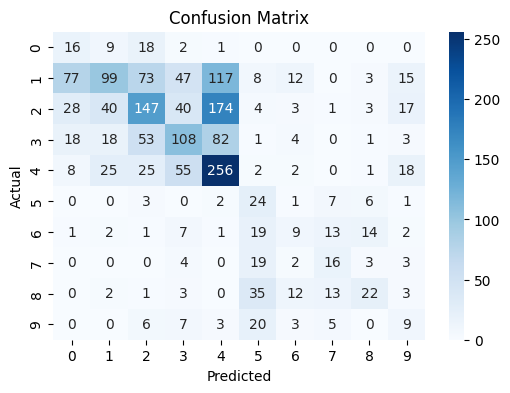

In [175]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")